<h1> Fractional Diffusion Equation </h1>

We solve the one dimensional fractional diffusion equation
\begin{equation}
\left\{ \begin{array}{ll}
u_t(x,t)=d(x)\,\partial^\alpha_x u(x,t), & 1\leq\alpha\leq2,\\
u(x,t_0)=f(x), & x\in\mathbb{R},\\
u(x,t)=0, & \vert x \vert\rightarrow\infty,
\end{array} \right. 
\end{equation}
with $d(x)>0$, by using discrete representations of Riemann–Liouville (left) derivative.

<h2> Essential Libraries </h2> 

In [1]:
# ----------------------------------------/
%matplotlib inline
# ----------------------------------------/
import numpy as np
import matplotlib.pyplot as plt

from scipy import *
from ipywidgets import *
from scipy import linalg
from numpy import asmatrix
from numpy import matlib as ml
from scipy.sparse import spdiags

<h2> Functions </h2>

In [2]:
def w(a,j,k):
    """
    interpolation weight coefficients
    """
    if (k <= j - 1):
        r = (j-k+1)**(3-a) - 2*(j-k)**(3-a) + (j-k-1)**(3-a)
    elif (k == j):
        r = 1
    return r
# -----------------------------------------------------------------/
def q(a,j,k):
    """
    Sousa-Li weight coefficients
    """
    if (k <= j - 1):
        r = w(a,j-1,k)-2*w(a,j,k) + w(a,j+1,k)
    elif (k == j):
        r = -2*w(a,j,j) + w(a,j+1,j)
    elif (k == j + 1):
        r = w(a,j+1,j+1)
    return r

<h2> Definitions </h2>

In [7]:
# space, time domain
xi, xf, ti, tf = -2, 2, 0, 5

# fractional order (1,2]
alpha = 1

# grid points
mu = 200

# steps
n = mu

# space, time intervals
h = (xf - xi)/(1.0 + mu)
k = (tf - ti)/float(n)

m = mu + 2

# coordinates
x = np.linspace(xi,xf,m)
t = np.linspace(ti,tf,n)

# convex weight in [1/2,1]
tau = 0.5

# vectors
o = np.ones(m)
u = np.zeros(m)

# matrices
I = ml.eye(m)
Q = np.zeros((m,m))
M = np.zeros((m,m))
U = np.zeros((m,n))

<h2>Initial + Boundary Data</h2>

In [8]:
# initial condition
f = lambda x: 4*(x**2)*(2-x)**2

# boundary condition (bona fide)
g = lambda x, t: 4*(x**2)*(2-x)**2

# diffusion
d = lambda x: 0.25*x**alpha

<h2> Method </h2>

In [9]:
# diagonal mattrix
M = k*h**(-alpha)/math.gamma(4.0 - alpha) * spdiags([d(x)], [0], m, m).toarray()
# -----------------------------------------------------------------/
for j in range(m):
    for k in range(m):
        if (k <= j - 1):
            Q[j,k] = q(alpha,j,k)
        elif (k == j):
            Q[j,k] = q(alpha,j,j)
        elif (k == j + 1):
            Q[j,k] = q(alpha,j,j + 1)
        elif k > j + 1:
            Q[j,k] = 0
# -----------------------------------------------------------------/
Ap = I - tau*M.dot(Q)
An = I + (1 - tau)*M.dot(Q)
# -----------------------------------------------------------------/
# left boundary
Ap[0,0], Ap[0,1] = 1, 0

# right boundary
Ap[m-1,m-2], Ap[m-1,m-1] = 0, 1

# left boundary
An[0,0], An[0,1] = 1, 0

# right boundary
An[m-1,m-2], An[m-1,m-1] = 0, 1
# -----------------------------------------------------------------/
Ai = linalg.inv(Ap)
# -----------------------------------------------------------------/
# initial condition
u = f(x)[:, None]
# -----------------------------------------------------------------/
for i in range(n):
    # boundary conditions
    u[0], u[-1] = g(xi, i*k + ti), g(xf, i*k + ti)
    
    # store data
    U[:,i] = np.asarray(u)[:,0]
    
    # solve linear system
    b = np.asmatrix(An) * np.asmatrix(u)
    u = np.asmatrix(Ai) * b

<h2> Plots </h2>

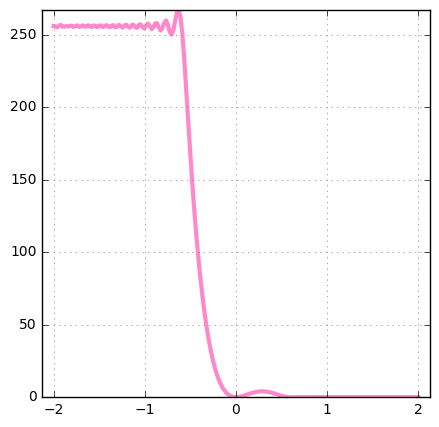

In [10]:
# --------------------/
# plots
def evolution(step):
    plt.figure(figsize=(5,5))
    plt.plot(x, U[:,step], lw=3, alpha=0.5, color='deeppink')
    plt.grid(color='gray', alpha=0.95)
    plt.xlim(x.min() - 0.125, x.max() + 0.125)
    plt.ylim(U.min() - 0.125, U.max() + 0.125)
# --------------------/
# interactive plot
step = widgets.IntSlider(min=0, max=n-1, description='step')
interact(evolution, step=step)

In [ ]:
%reset

> NB property of [FVNTS](http://www.fvnts.ch/) 